### Synthetic data - SVC

In [ ]:
from sklearn.datasets import make_classification
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
X, y = make_classification(n_samples= 1000, n_features=2, n_classes= 2, n_clusters_per_class=2, n_redundant=0, random_state=95)


In [21]:
X = pd.DataFrame(X)
X

,0,1
0,-1.732628,-0.804393
1,0.703056,-0.519319
2,1.498681,-1.447842
3,-0.957300,1.366625
4,1.499161,-1.182769
...,...,...
995,4.372271,0.202776
996,-2.275622,-1.968956
997,-1.198234,-0.827479
998,-1.000494,2.275180


<Axes: xlabel='0', ylabel='1'>

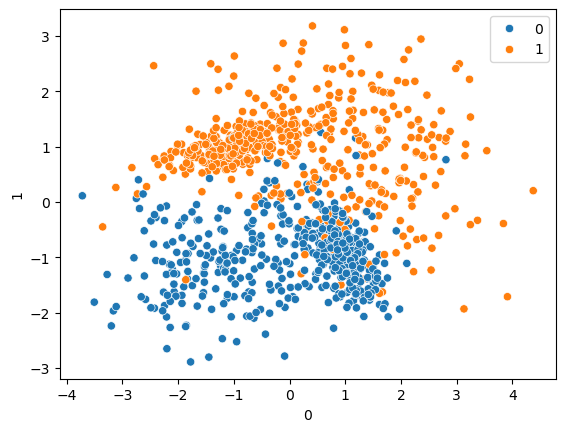

In [22]:
sns.scatterplot(data=X, x= X[0], y = X[1], hue=y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=95)

In [25]:
X_train.shape, y_test.shape

((700, 2), (300,))

In [26]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

In [27]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
svc.coef_

array([[0.3543889, 2.1495161]])

In [29]:
y_pred = svc.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       146
           1       0.94      0.89      0.91       154

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300


 	 Accuracy Score: 91.33 %

Confusion Matrix :
 [[137   9]
 [ 17 137]]


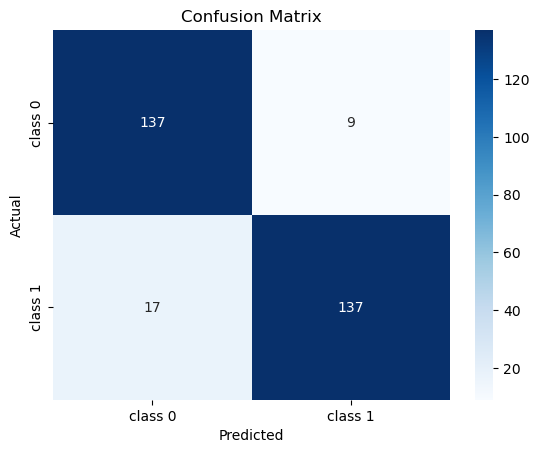

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"\n \t Accuracy Score: {round(accuracy_score(y_test, y_pred)*100, 2)} %")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix :\n",cm)
sns.heatmap(data=cm, annot=True, fmt='d', cmap='Blues', xticklabels=['class 0', 'class 1'], yticklabels= ['class 0', 'class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
sns
plt.show()


### Hyper Parameter tuning for Regularization Parameter and gamma

In [43]:
from sklearn.model_selection import GridSearchCV

params = {
    'C' : np.linspace(0.1, 10, num = 5),
    'gamma' : np.linspace(0.001, 1, num = 5),
    'kernel' : ['linear']
}
gcv = GridSearchCV(estimator= SVC(), param_grid= params, refit= True, cv= 5, verbose= 3)

gcv.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.886 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.957 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.921 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.914 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.936 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.25075, kernel=linear;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.25075, kernel=linear;, score=0.957 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.25075, kernel=linear;, score=0.921 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.25075, kernel=linear;, score=0.914 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.25075, kernel=linear;, score=0.936 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.5005, kernel=linear;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.5005, kernel=l

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([ 0.1  ,  2.575,  5.05 ,  7.525, 10.   ]),
                         'gamma': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'kernel': ['linear']},
             verbose=3)

In [48]:
print("Best Accuracy: ",gcv.best_score_)
print("Best Estimator: ", gcv.best_estimator_)

Best Accuracy:  0.9242857142857142
Best Estimator:  SVC(C=2.575, gamma=0.001, kernel='linear')


In [49]:
tuned_svc = gcv.best_estimator_

tuned_svc

SVC(C=2.575, gamma=0.001, kernel='linear')

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       146
           1       0.94      0.90      0.92       154

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300


 	 Accuracy Score: 91.67 %

Confusion Matrix :
 [[137   9]
 [ 16 138]]


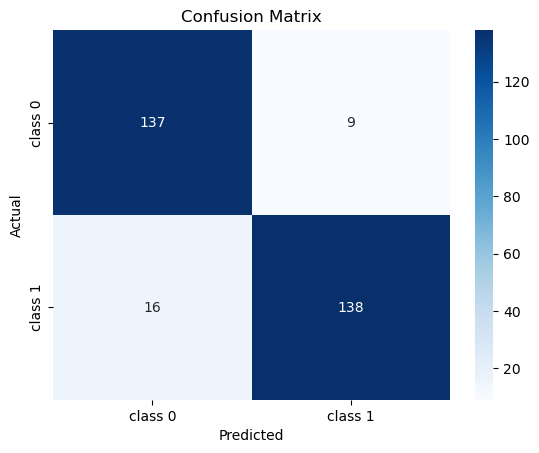

In [51]:
y_pred2 = tuned_svc.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred2))
print(f"\n \t Accuracy Score: {round(accuracy_score(y_test, y_pred2)*100, 2)} %")

cm2 = confusion_matrix(y_test, y_pred2)
print("\nConfusion Matrix :\n",cm2)
sns.heatmap(data=cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['class 0', 'class 1'], yticklabels= ['class 0', 'class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
sns
plt.show()